In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# CSV file load karlo
orders = pd.read_csv('cleaned_orders.csv')
order_details = pd.read_csv('cleaned_order_details.csv')
pizzas = pd.read_csv('cleaned_pizzas.csv')
pizza_types = pd.read_csv('cleaned_pizza_types.csv')


In [65]:
print("Missing Values in Each Table:")
print(orders.isnull().sum(), "\n")
print(order_details.isnull().sum(), "\n")
print(pizzas.isnull().sum(), "\n")
print(pizza_types.isnull().sum(), "\n")

Missing Values in Each Table:
orderid        0
date           0
time           0
day_of_week    0
order_month    0
is_weekend     0
hour           0
dtype: int64 

order_detail_id    0
order_id           0
pizza_id           0
quantiy            0
dtype: int64 

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64 

pizza_type     0
name           0
category       0
ingredients    0
dtype: int64 



In [66]:
print("Duplicate Rows in Each Table:")
print("Orders:", orders.duplicated().sum())
print("Order Details:", order_details.duplicated().sum())
print("Pizzas:", pizzas.duplicated().sum())
print("Pizza Types:", pizza_types.duplicated().sum())

Duplicate Rows in Each Table:
Orders: 0
Order Details: 0
Pizzas: 0
Pizza Types: 0


In [67]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   orderid      21350 non-null  int64 
 1   date         21350 non-null  object
 2   time         21350 non-null  object
 3   day_of_week  21350 non-null  object
 4   order_month  21350 non-null  int64 
 5   is_weekend   21350 non-null  bool  
 6   hour         21350 non-null  int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 1021.8+ KB


# MONTHLY SALES 

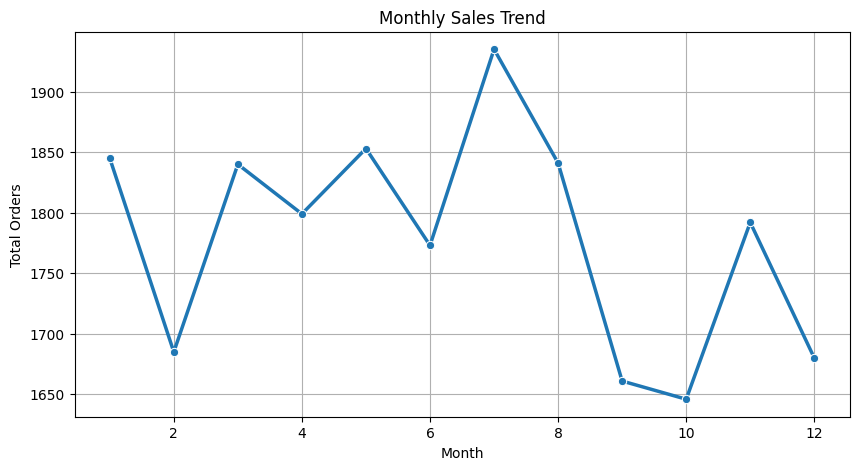

In [68]:
monthly_sales = orders.groupby('order_month')['orderid'].count()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", linewidth=2.5)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.grid()
plt.show()

# Weekday vs Weekend Sales Comparison

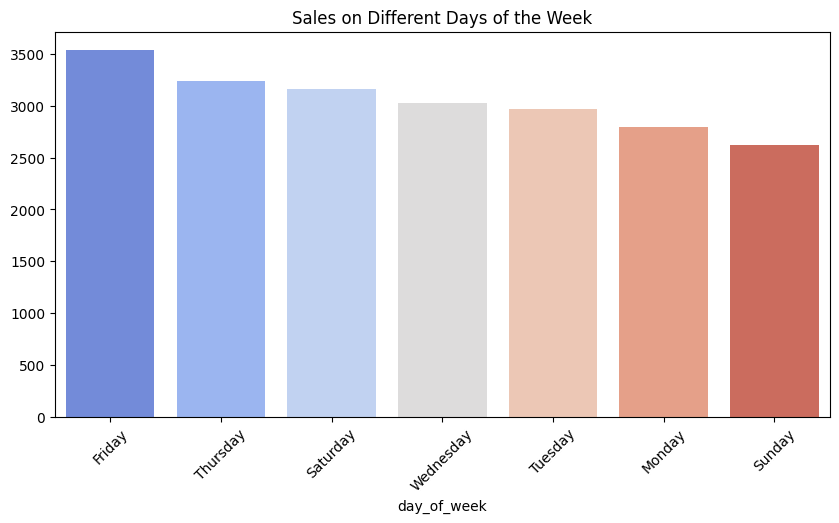

In [69]:
daywise_sales = orders['day_of_week'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=daywise_sales.index, y=daywise_sales.values, hue=daywise_sales.index, palette="coolwarm")
plt.title("Sales on Different Days of the Week")
plt.xticks(rotation=45)
plt.show()

#  Price vs Quantity Ordered

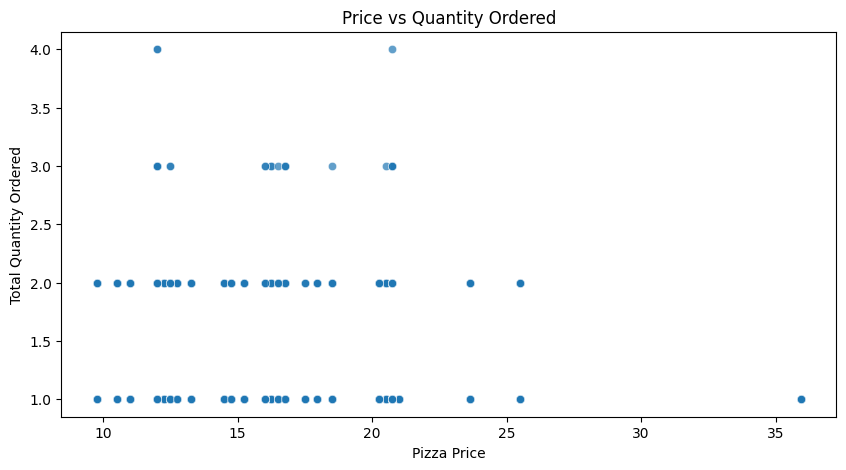

In [70]:
merged_data = order_details.merge(pizzas, on='pizza_id', how='left')

plt.figure(figsize=(10,5))
sns.scatterplot(x=merged_data['price'], y=merged_data['quantiy'], alpha=0.7)
plt.title("Price vs Quantity Ordered")
plt.xlabel("Pizza Price")
plt.ylabel("Total Quantity Ordered")
plt.show()

In [71]:
merged_data

,order_detail_id,order_id,pizza_id,quantiy,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00
...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95
48617,48618,21348,napolitana_s,1,napolitana,S,12.00
48618,48619,21349,mexicana_l,1,mexicana,L,20.25


# pizza size sales

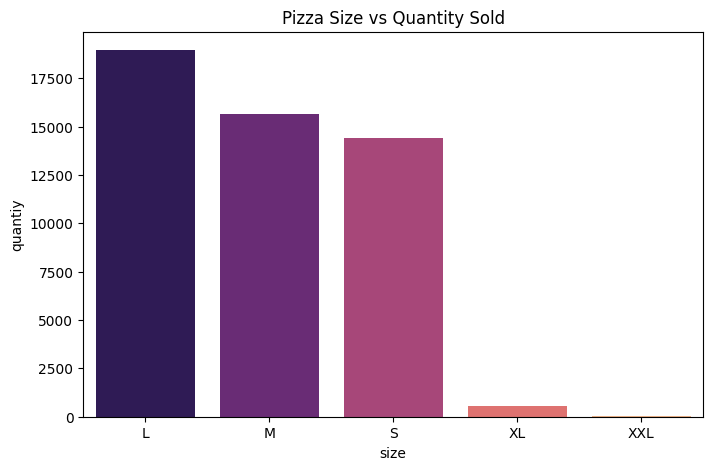

In [72]:
size_data = merged_data.groupby('size')['quantiy'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x=size_data['size'], y=size_data['quantiy'],hue=size_data['size'], palette="magma")
plt.title("Pizza Size vs Quantity Sold")
plt.show()

# highest sales pizza type

In [73]:
highest_sales = merged_data.merge(pizza_types, left_on='pizza_type_id', right_on='pizza_type', how='left')
highest_sales

,order_detail_id,order_id,pizza_id,quantiy,pizza_type_id,size,price,pizza_type,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,five_cheese,L,18.50,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,ital_supr,L,20.75,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,mexicana,M,16.00,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95,four_cheese,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,napolitana,S,12.00,napolitana,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,mexicana,L,20.25,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


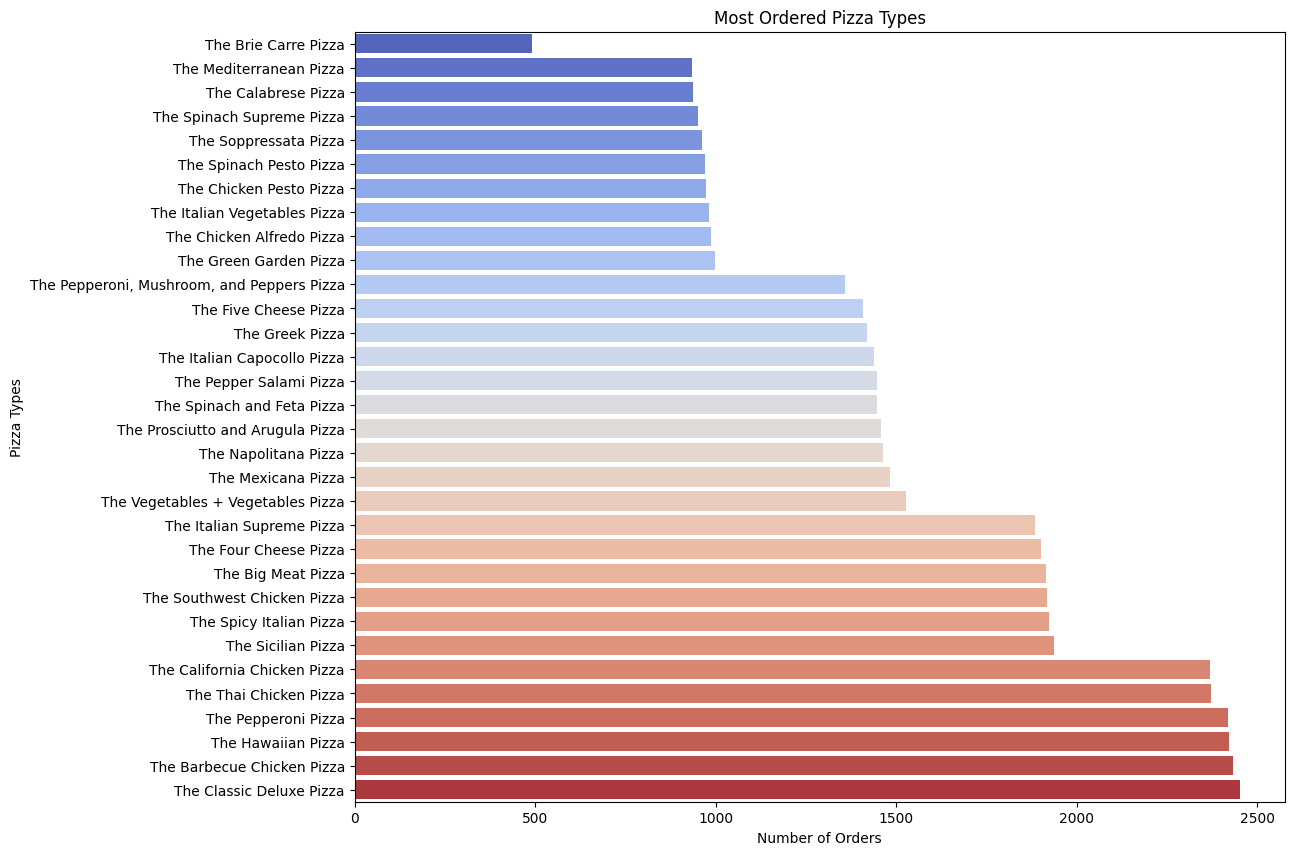

In [74]:
plt.figure(figsize=(12,10))  # Large figure for better visibility
pizza_counts = highest_sales.groupby("name")["quantiy"].sum().sort_values()

sns.barplot(y=pizza_counts.index, x=pizza_counts.values,hue =pizza_counts.index, palette="coolwarm")
plt.title("Most Ordered Pizza Types")
plt.xlabel("Number of Orders")
plt.ylabel("Pizza Types")
plt.show()


# peak hours

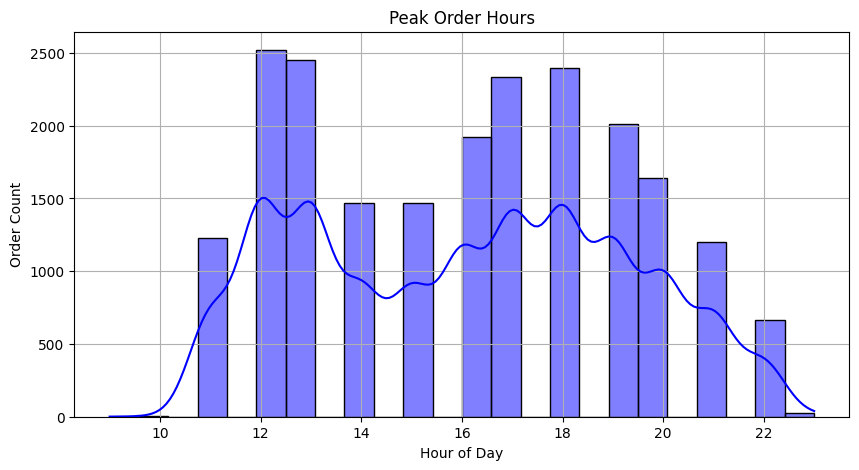

In [75]:
plt.figure(figsize=(10,5))
sns.histplot(orders['hour'], bins=24, kde=True, color='blue')
plt.title("Peak Order Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Order Count")
plt.grid()
plt.show()

# FEATURE ENGINNERING

# TOTAL PRICE PER ORDER

In [77]:
merged = order_details.merge(pizzas, on='pizza_id', how='left')
order_details['total price'] = merged['quantiy'] * merged['price']

In [80]:
orders= orders.merge(order_details.groupby('order_id')['total price'].sum(), left_on='orderid', right_on='order_id', how='left')

In [87]:
orders

,orderid,date,time,day_of_week,order_month,is_weekend,hour,total price,total items,time_of_day
0,1,2015-01-01,0 days 11:38:36,Thursday,1,False,11,13.25,1,Morning
1,2,2015-01-01,0 days 11:57:40,Thursday,1,False,11,92.00,5,Morning
2,3,2015-01-01,0 days 12:12:28,Thursday,1,False,12,37.25,2,Afternoon
3,4,2015-01-01,0 days 12:16:31,Thursday,1,False,12,16.50,1,Afternoon
4,5,2015-01-01,0 days 12:21:30,Thursday,1,False,12,16.50,1,Afternoon
...,...,...,...,...,...,...,...,...,...,...
21345,21346,2015-12-31,0 days 20:51:07,Thursday,12,False,20,62.25,4,Evening
21346,21347,2015-12-31,0 days 21:14:37,Thursday,12,False,21,66.50,4,Night
21347,21348,2015-12-31,0 days 21:23:10,Thursday,12,False,21,46.70,3,Night
21348,21349,2015-12-31,0 days 22:09:54,Thursday,12,False,22,20.25,1,Night


# ITEMS PER ORDER

In [84]:
orders= orders.merge(order_details.groupby('order_id')['quantiy'].sum().rename('total items'), left_on='orderid', right_on='order_id', how='left')

# TIME OF DAY

In [86]:
def get_time_of_day(hour):
    if hour >= 5 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 17:
        return 'Afternoon'
    elif hour >= 17 and hour < 21:
        return 'Evening'
    else:
        return 'Night'

orders['time_of_day'] = orders['hour'].apply(get_time_of_day)

# total revenue by product

In [91]:
product_sales = order_details.groupby('pizza_id')['total price'].sum().reset_index()
product_sales = product_sales.rename(columns={'total price': 'total revenue'})

In [93]:
product_sales

,pizza_id,total revenue
0,bbq_ckn_l,20584.00
1,bbq_ckn_m,16013.00
2,bbq_ckn_s,6171.00
3,big_meat_s,22968.00
4,brie_carre_s,11588.50
...,...,...
86,the_greek_xl,14076.00
87,the_greek_xxl,1006.60
88,veggie_veg_l,8646.75
89,veggie_veg_m,10160.00


# top selling pizzas

In [95]:
top_selling_pizzas = order_details.groupby('pizza_id')['quantiy'].sum().reset_index()
top_selling_pizzas = top_selling_pizzas.rename(columns={'quantity': 'total_sold'})

In [96]:
top_selling_pizzas

,pizza_id,quantiy
0,bbq_ckn_l,992
1,bbq_ckn_m,956
2,bbq_ckn_s,484
3,big_meat_s,1914
4,brie_carre_s,490
...,...,...
86,the_greek_xl,552
87,the_greek_xxl,28
88,veggie_veg_l,427
89,veggie_veg_m,635


# pizza category by price

In [97]:
def categorize_price(price):
    if price < 10:
        return "Budget"
    elif price < 20:
        return "Mid-Range"
    else:
        return "Premium"

pizzas['price category'] = pizzas['price'].apply(categorize_price)

In [98]:
pizzas

,pizza_id,pizza_type_id,size,price,price category
0,bbq_ckn_l,bbq_ckn,L,20.75,Premium
1,bbq_ckn_m,bbq_ckn,M,16.75,Mid-Range
2,bbq_ckn_s,bbq_ckn,S,12.75,Mid-Range
3,big_meat_l,big_meat,L,20.50,Premium
4,big_meat_m,big_meat,M,16.00,Mid-Range
...,...,...,...,...,...
91,the_greek_xl,the_greek,XL,25.50,Premium
92,the_greek_xxl,the_greek,XXL,35.95,Premium
93,veggie_veg_l,veggie_veg,L,20.25,Premium
94,veggie_veg_m,veggie_veg,M,16.00,Mid-Range
